# Visualizing Euro daily exchange rates across history

In this project, I will visualize Euro-US Dollar daily exchange rates between 1999 and 2021. (A 1.5 Euro-USD exchange rate means you get 1.5 USD if you pay 1.0 Euro -- so the higher the exchange rate, the more valuable the Euro relative to the dollar).

Data for this project came from the European Central Bank and are available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020).

## Setup

In [326]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib notebook

## Load data

In [327]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

# preview the dataframe
exchange_rates.head(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


## Data cleaning

In [328]:
# rename relevant columns
exchange_rates.rename(columns={'Period\\Unit:':'Time',
                               '[US dollar ]':'US_dollar'},
                     inplace=True)

# change Time to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# sort values by Time in ascending order
exchange_rates.sort_values('Time', inplace=True)

# reset index and drop initial index
exchange_rates.reset_index(drop=True, inplace=True)

# isolate Time/US_dollar columns only
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

# remove all rows where US_dollar is '-'
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# convert US_dollar from string to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float64')

# preview cleaned dataframe
euro_to_dollar.head(5)

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [329]:
print(euro_to_dollar.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB
None


## Data smoothing

Next, we can examine the Euro-USD exchange rates over time:

<IPython.core.display.Javascript object>


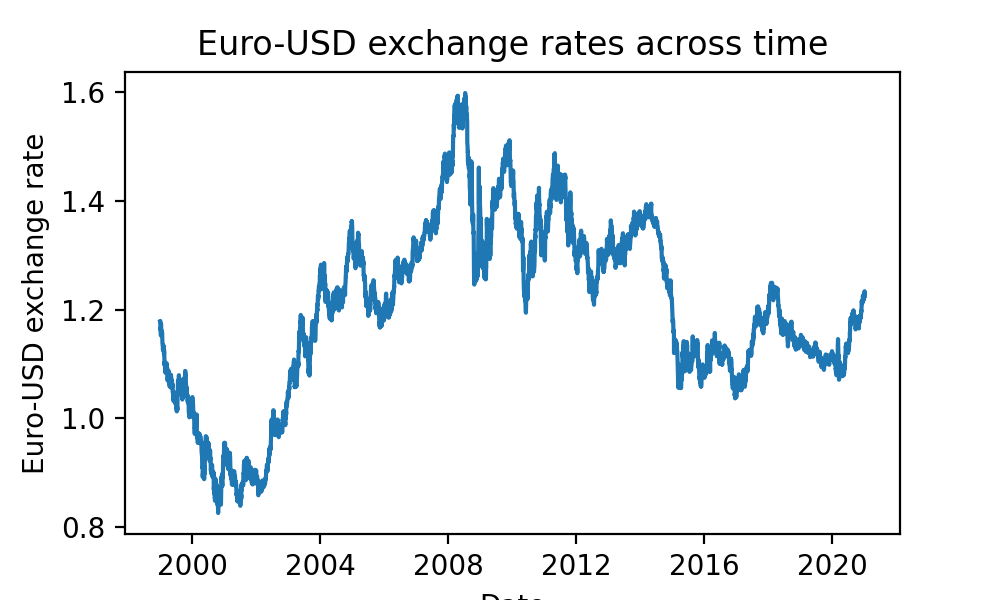

In [330]:
euro_to_dollar = euro_to_dollar.set_index('Time')

fig = plt.figure(figsize=(5,3))
plt.plot(euro_to_dollar['US_dollar'])
plt.title('Euro-USD exchange rates across time')
plt.xlabel('Date')
plt.ylabel('Euro-USD exchange rate')
plt.show()

euro_to_dollar = euro_to_dollar.reset_index()

For a slightly smoothed version of the data, I'll calculate a rolling average of the Euro-USD exchange rate, with a moving window of 30 days:

In [331]:
# calculate rolling average for US_dollar with moving window of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

<IPython.core.display.Javascript object>


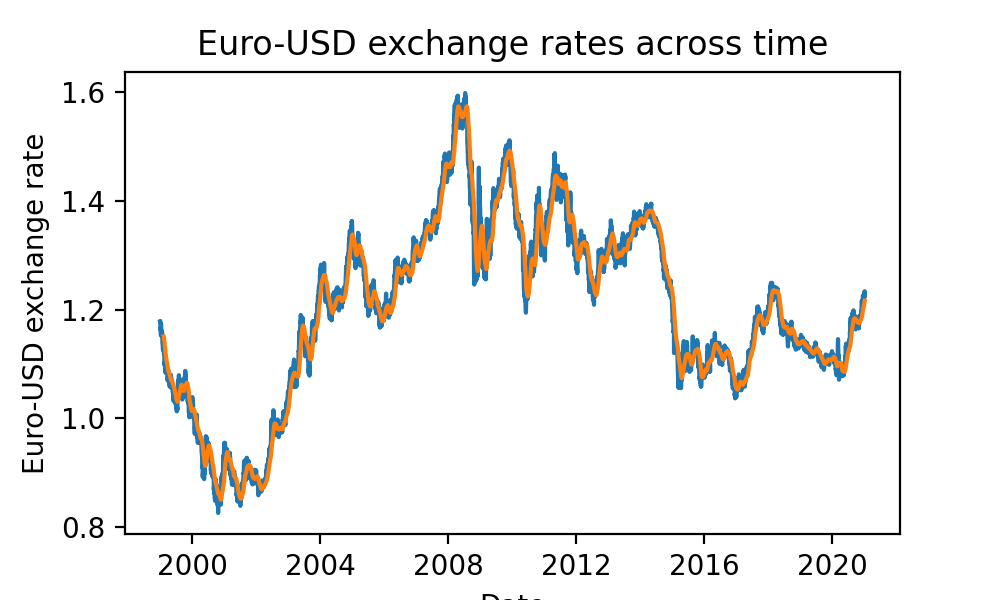

In [332]:
euro_to_dollar = euro_to_dollar.set_index('Time')
fig = plt.figure(figsize=(5,3))
plt.plot(euro_to_dollar['US_dollar'], label='Original')
plt.plot(euro_to_dollar['rolling_mean'], label='30-day moving average')
plt.title('Euro-USD exchange rates across time')
plt.xlabel('Date')
plt.ylabel('Euro-USD exchange rate')
plt.show()

euro_to_dollar = euro_to_dollar.reset_index()

## Visualization

For this dataset, I will visualize the smoothed Euro-USD exchange rate over time, under the last 3 US presidents: George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021).

In [333]:
# add a column indicating year
euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year

# set index
#euro_to_dollar = euro_to_dollar.set_index('Time')

In [334]:
# split data based on president at the time
rates_bush = euro_to_dollar[(euro_to_dollar['Year'] >= 2001) & (euro_to_dollar['Year'] < 2009)]
rates_obama = euro_to_dollar[(euro_to_dollar['Year'] >= 2009) & (euro_to_dollar['Year'] < 2017)]
rates_trump = euro_to_dollar[(euro_to_dollar['Year'] >= 2017) & (euro_to_dollar['Year'] < 2021)]

In [335]:
# compute average exchange rate for title
avg_rate = euro_to_dollar[euro_to_dollar['Year'].between(2001, 2021, inclusive=True)]['US_dollar'].mean()

In [336]:
rates_trump.head()

,Time,US_dollar,rolling_mean,Year
4610,2017-01-02,1.0465,1.055517,2017
4611,2017-01-03,1.0385,1.054697,2017
4612,2017-01-04,1.0437,1.054097,2017
4613,2017-01-05,1.0501,1.053760,2017
4614,2017-01-06,1.0589,1.053897,2017


<IPython.core.display.Javascript object>


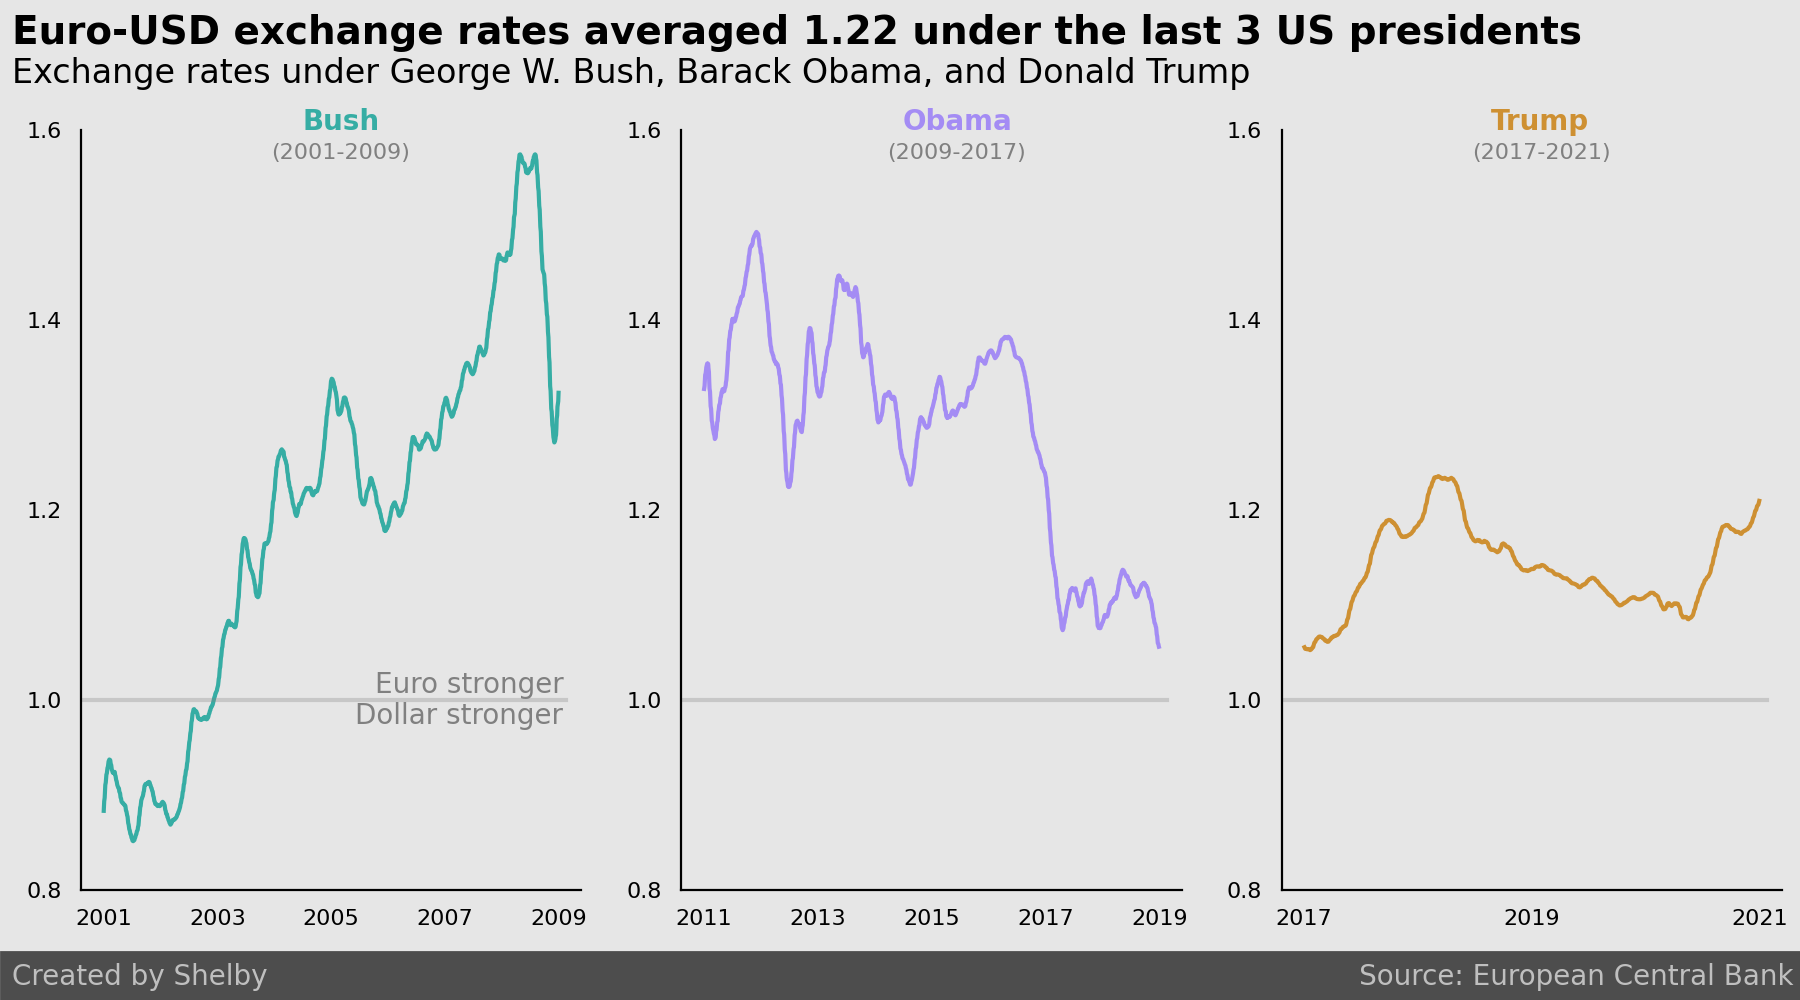

In [339]:
### figure setup
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                                   figsize=(9,5), 
                                   facecolor='#e6e6e6')

style.use('default')

fig.subplots_adjust(
    top=0.87,
    bottom=0.110,
    left=0.045,
    right=0.99,
    hspace=0.2,
    wspace=0.2
)

### consistent across subplots
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.grid(visible=False)
    ax.set_ylim([0.8, 1.6])
    ax.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels([0.8, 1.0, 1.2, 1.4, 1.6], size=8)
    ax.tick_params(left=False, bottom=False)
    
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)

### subplot 1: bush (2001-2009)
ax1.plot(rates_bush['Time'], rates_bush['rolling_mean'],
        color=sns.color_palette("husl", 8)[4])
ax1.text(x=731764.0, y=1.6, s='Bush',
        weight='bold', color=sns.color_palette("husl", 8)[4])
ax1.text(x=731563.0, y=1.57, s='(2001-2009)', 
         size=8, color='grey')
ax1.set_xticks([datetime.strptime('2001', '%Y'), 
                datetime.strptime('2003', '%Y'),
                datetime.strptime('2005', '%Y'),
                datetime.strptime('2007', '%Y'),
                datetime.strptime('2009', '%Y')])
ax1.set_xticklabels(['2001', '2003', '2005', '2007', '2009'], size=8)
ax1.set_facecolor('#e6e6e6')

### subplot 2: bush (2009-2017)
ax2.plot(rates_obama['Time'], rates_obama['rolling_mean'],
        color=sns.color_palette("husl", 8)[6])
ax2.text(x=734686.0, y=1.6, s='Obama',
        weight='bold', color=sns.color_palette("husl", 8)[6])
ax2.text(x=734586.0, y=1.57, s='(2009-2017)',
        size=8, color='grey')
ax2.set_xticks([datetime.strptime('2009', '%Y'), 
                datetime.strptime('2011', '%Y'),
                datetime.strptime('2013', '%Y'),
                datetime.strptime('2015', '%Y'),
                datetime.strptime('2017', '%Y')])
ax2.set_xticklabels(['2011', '2013', '2015', '2017', '2019'], size=8)
ax2.set_facecolor('#e6e6e6')

### subplot 3: trump (2017-2021)
ax3.plot(rates_trump['Time'], rates_trump['rolling_mean'],
        color=sns.color_palette("husl", 8)[1])
ax3.text(x=736930.6, y=1.6, s='Trump',
        weight='bold', color=sns.color_palette("husl", 8)[1])
ax3.text(x=736869.5, y=1.57, s='(2017-2021)',
        size=8, color='grey')
ax3.set_xticks([datetime.strptime('2017', '%Y'), 
                datetime.strptime('2019', '%Y'),
                datetime.strptime('2021', '%Y')])
ax3.set_xticklabels(['2017', '2019', '2021'], size=8)
ax3.set_facecolor('#e6e6e6')

### lines showing 1.0 exchange rate
ax1.axhline(y=1, color='grey', alpha=0.3, xmax=0.97)
ax1.text(x=732230, y=1.007, s='Euro stronger',
        color='grey', size=10)
ax1.text(x=732100, y=0.975, s='Dollar stronger',
        color='grey', size=10)
ax2.axhline(y=1, color='grey', alpha=0.3, xmax=0.97)
ax3.axhline(y=1, color='grey', alpha=0.3, xmax=0.97)

### title and subtitle
ax1.text(x=729900., y=0.7, 
         s='Created by Shelby' + ' '*123 + 'Source: European Central Bank',
         color= '#f0f0f0', backgroundcolor='#4d4d4d', alpha=0.7)
ax1.text(x=729900., y=1.69, 
         s='Euro-USD exchange rates averaged ' + "{:.2f}".format(avg_rate) + ' under the last 3 US presidents',
        weight='bold', size=14)
ax1.text(x=729900., y=1.65, 
         s='Exchange rates under George W. Bush, Barack Obama, and Donald Trump',
        size=12)

fig.show()

In [338]:
plt.savefig("exchange-rates_fig.png", dpi=600,
            bbox_inches='tight',pad_inches=-1)

Overall, the figure shows that the Euro was stronger than the dollar for the majority of all 3 presidencies. Under President Bush, the Euro became increasingly strong relative to the dollar, probably also reflecting the US's ongoing war. Then, the Euro's strength relative to the dollar decreased across the course of President Obama's term. Finally, the Euro's strength relative to the dollar oscillated during President Trump's term, with the Euro's relative strength starting in 2020 likely reflecting the coronavirus pandemic.




